In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [5]:
df = pd.read_csv("C:/Users/shree/Desktop/titanic-data.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("Shape:", df.shape)
df.info()


Shape: (418, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
(df.isnull().sum() / len(df)) * 100


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df.describe(include="object")


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [12]:
survival_rate = df["Survived"].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")


Overall Survival Rate: 36.36%


In [13]:
df.groupby("Sex")["Survived"].mean() * 100


Sex
female    100.0
male        0.0
Name: Survived, dtype: float64

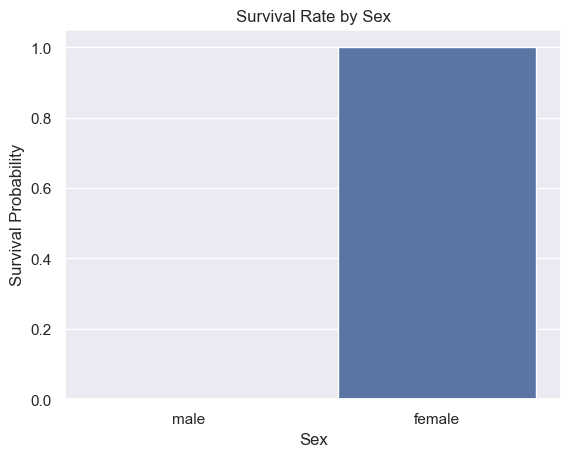

In [14]:
sns.barplot(data=df, x="Sex", y="Survived")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Probability")
plt.show()


In [15]:
df.groupby("Pclass")["Survived"].mean() * 100


Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

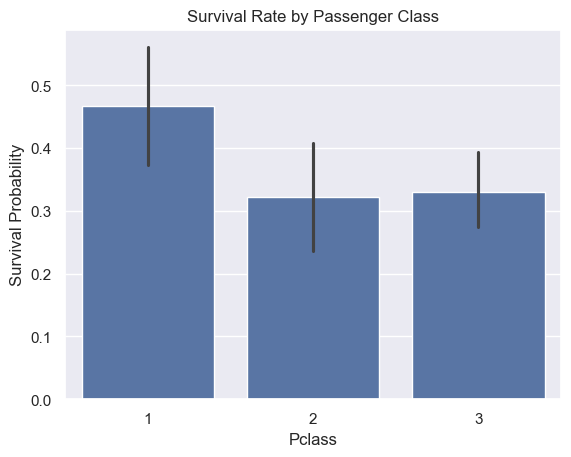

In [16]:
sns.barplot(data=df, x="Pclass", y="Survived")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Probability")
plt.show()


In [17]:
df["Age"].isnull().sum()


np.int64(86)

In [19]:
df["Age"] = df["Age"].fillna(df["Age"].median())


In [20]:
df["Age"].isnull().sum()


np.int64(0)

In [21]:
bins = [0, 12, 18, 30, 45, 60, 80]
labels = ["Child(0-12)", "Teen(13-18)", "Young(19-30)", "Adult(31-45)", "Middle(46-60)", "Senior(60+)"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)
df[["Age", "AgeGroup"]].head()


,Age,AgeGroup
0,34.5,Adult(31-45)
1,47.0,Middle(46-60)
2,62.0,Senior(60+)
3,27.0,Young(19-30)
4,22.0,Young(19-30)


In [22]:
df.groupby("AgeGroup")["Survived"].mean() * 100


C:\Users\shree\AppData\Local\Temp\ipykernel_11916\3482296926.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["Survived"].mean() * 100


AgeGroup
Child(0-12)      48.000000
Teen(13-18)      41.379310
Young(19-30)     33.620690
Adult(31-45)     35.000000
Middle(46-60)    43.902439
Senior(60+)      36.363636
Name: Survived, dtype: float64

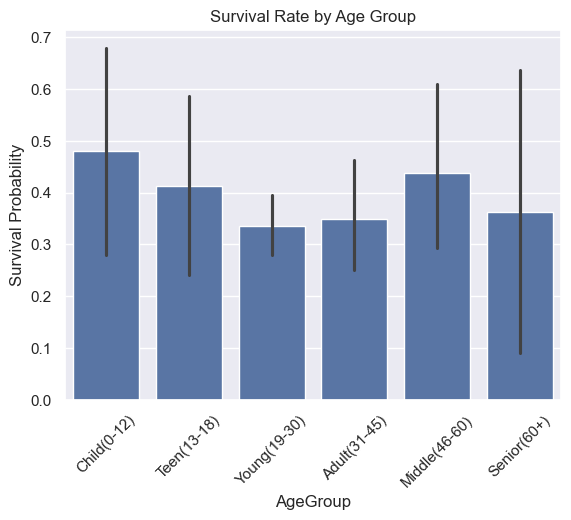

In [23]:
sns.barplot(data=df, x="AgeGroup", y="Survived")
plt.xticks(rotation=45)
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Probability")
plt.show()


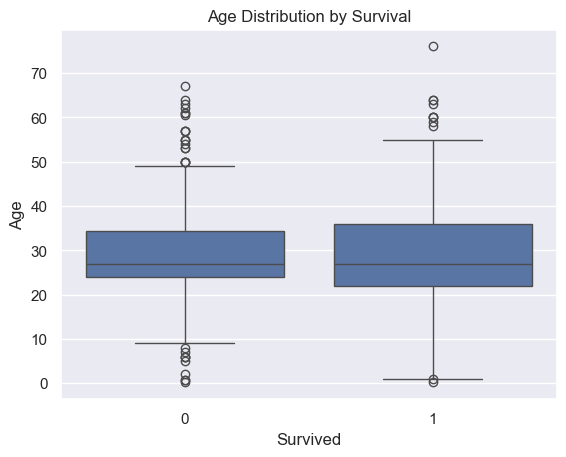

In [24]:
sns.boxplot(data=df, x="Survived", y="Age")
plt.title("Age Distribution by Survival")
plt.show()


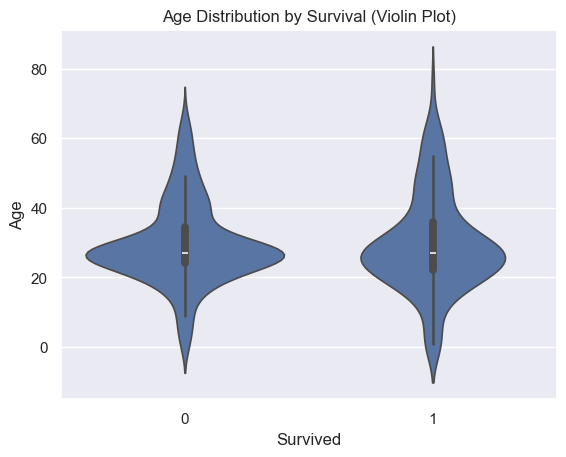

In [25]:
sns.violinplot(data=df, x="Survived", y="Age")
plt.title("Age Distribution by Survival (Violin Plot)")
plt.show()


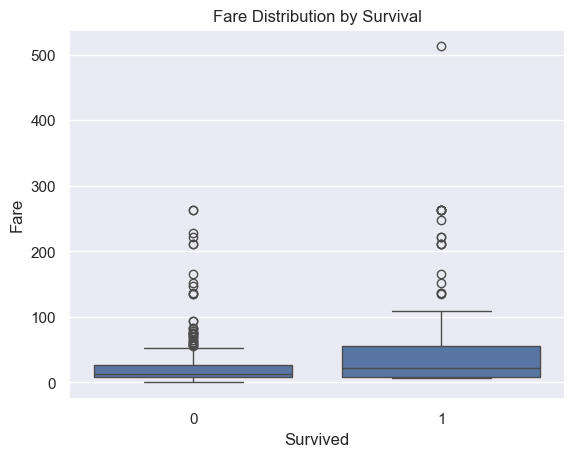

In [26]:
sns.boxplot(data=df, x="Survived", y="Fare")
plt.title("Fare Distribution by Survival")
plt.show()


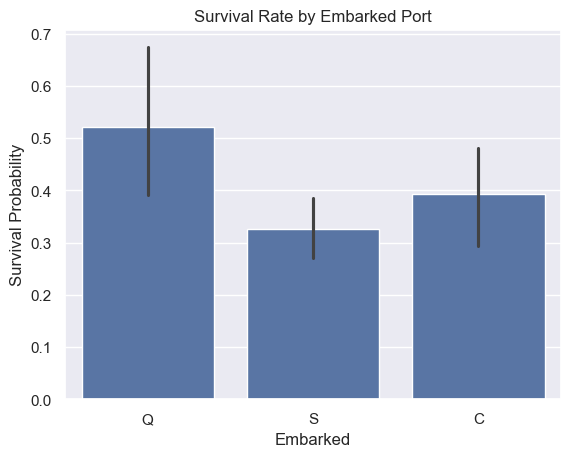

In [27]:
sns.barplot(data=df, x="Embarked", y="Survived")
plt.title("Survival Rate by Embarked Port")
plt.ylabel("Survival Probability")
plt.show()


In [28]:
df["Cabin"].isnull().sum()


np.int64(327)

In [29]:
df["HasCabin"] = df["Cabin"].notnull().astype(int)
df.groupby("HasCabin")["Survived"].mean() * 100


HasCabin
0    33.027523
1    48.351648
Name: Survived, dtype: float64

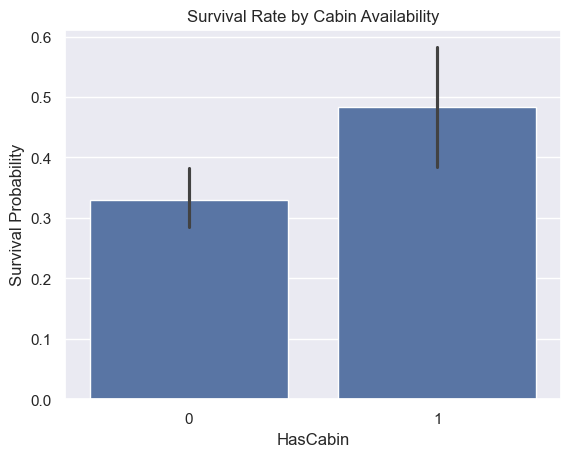

In [30]:
sns.barplot(data=df, x="HasCabin", y="Survived")
plt.title("Survival Rate by Cabin Availability")
plt.ylabel("Survival Probability")
plt.show()


In [31]:
df.to_csv("../data/titanic_cleaned.csv", index=False)
print("Saved cleaned dataset!")


Saved cleaned dataset!
